# Constants Assumed

In [10]:
# X direction pointing towards Galactic center from Sun
# Y direction pointing towards direction of Rotation
# Z direction pointing towards Galactic north pole
# X_sun = -8000 parsecs
# Y_sun = 0 parsec
# Z_sun = 25 parsecs

# Importing the FITS data and reading it

In [1]:

from astropy.table import Table  
# Importing Table from astropy because it carries units.

data_table = Table.read('C:/Users/dougl/Desktop/Marchetti data/data.fits', format = 'fits') 
# This is how I open the file. The part in quotes is the precise
# location of the file in my computer.

print(data_table[1].columns) 
# index number 1 of the columns is the header of each column. 
#I'm doing this so I know what they have

<TableColumns names=('source_id','ra','dec','parallax','e_parallax','pmra','e_pmra','pmdec','e_pmdec','vrad','e_vrad','GMag','dist','el_dist','eu_dist','rGC','el_rGC','eu_rGC','RGC','el_RGC','eu_RGC','xGC','el_xGC','eu_xGC','yGC','el_yGC','eu_yGC','zGC','el_zGC','eu_zGC','U','el_U','eu_U','V','el_V','eu_V','W','el_W','eu_W','UW','el_UW','eu_UW','vR','el_vR','eu_vR','vtot','el_vtot','eu_vtot','P_ub')>


# Creating Variables

In [2]:
U = data_table["U"]
V = data_table["V"]
W = data_table["W"]      
X = data_table["xGC"]                
Y = data_table["yGC"]
Z = data_table["zGC"]
### Just creating some important variables that I'm going to use throughout.
### All of these are now 1-D Matrices with units. 

In [3]:
# We can print the Table now too if we want
# This also tells me how many points we are dealing with (7183262 stars)
print(data_table)

     source_id              ra         ...       eu_vtot          P_ub  
                           deg         ...        km / s                
------------------- ------------------ ... ------------------- ---------
      2851858288640  45.13214374784831 ...  0.5053219512575993       0.0
      3332894779520  45.05816745630085 ...  1.1452636285489177       0.0
      7632157690368  45.03433652674343 ...  0.2826076895333358       0.0
      9281425163264  45.16500808636506 ...  0.7631687859223462       0.0
     12545600306304 45.234476412246075 ...  0.5946487375764491       0.0
     13301514552192  45.08615519019486 ... 0.16332905283312016       0.0
     13473313244288  45.06654206842413 ...  0.5596210790046712       0.0
     15530601898496  45.20459588312845 ...  1.7219943986792998       0.0
     15637976759168  45.19462195720764 ...  0.5819158181860757       0.0
     15741055975040   45.1360380706232 ... 0.24802411778580336       0.0
                ...                ... ...         

# Selecting Stars in a radius of 100pc around Sun

In [30]:
# The data set does have a column for values of R, but I could
# also just create my own R by doing the x**2 + y **2. I'm going to
# just pick the data set's version because it saves time. 

rng = 7183262   ## Range of dataset ##

#Creating empty arrays.
Close_X = []
Close_Y = []        
Close_Z = []        
Close_U = []
Close_V = []
Close_W = []
Close_R = []

###########################################################################################
#Making a for loop in the range of the entire data set.
for i in range(0, rng-1):
    X_loop = data_table["xGC"][i] + 8000
    Y_loop = data_table["yGC"][i]
    Z_loop = data_table["zGC"][i] - 25 
    U_loop = data_table["U"][i]        
    V_loop = data_table["V"][i]        
    W_loop = data_table["W"][i]
    R_loop = data_table["RGC"][i]
#Indexing and Correcting the values so they center around the Sun.
    
    r_squared = X_loop**2 + Y_loop**2

###########################################################################################
#Setting my limit as a cylinder of radius 100pc around the Sun's position.    
    if r_squared <10000:
###########################################################################################
#These are all the ones within my limit. So I add them one by one.
#Re-centering the coordinates to the Galactic Center and making them kpc.
        Close_X.append(X_loop*0.001 - 8) 
        Close_Y.append(Y_loop*0.001)
        Close_Z.append((Z_loop + 25)*0.001)
        Close_U.append(U_loop)      
        Close_V.append(V_loop)      
        Close_W.append(W_loop)
        Close_R.append(R_loop*0.001)

# Scatter Plot: U x V

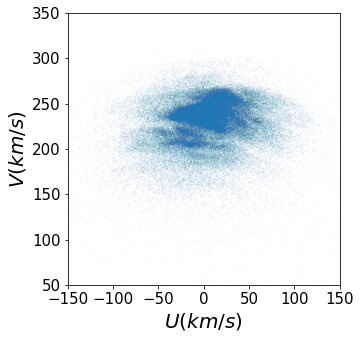

In [31]:
##########################################################################################
# importing matplotlib
import matplotlib.pyplot as plt  

plt.figure(figsize=(5,5))
#Making a figure with size 5 by 5 just so it has a nice size#

plt.scatter(Close_U, Close_V, s=0.17, alpha=0.05)
#scatter plot; s is how big the dots are going to be; alpha is how transparent they are.# 

plt.xlim(-150,150)
plt.ylim(50,350)
#Setting x y limits. I played around with this until the image was almost centered

plt.xlabel("$U(km/s)$", fontsize=20)
plt.ylabel("$V(km/s)$", fontsize=20)
#These are the labels for each axis##

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#Making my ticks bigger so they look visible##

plt.gca().set_aspect("equal",adjustable="box")
#This is to make sure the spacing between my ticks is the same of both axis.
#The adjustable='box' argument is to make your image a box, 
#which should already be true from the figsize = (5,5) 

# 2-D Histogram:  U x V

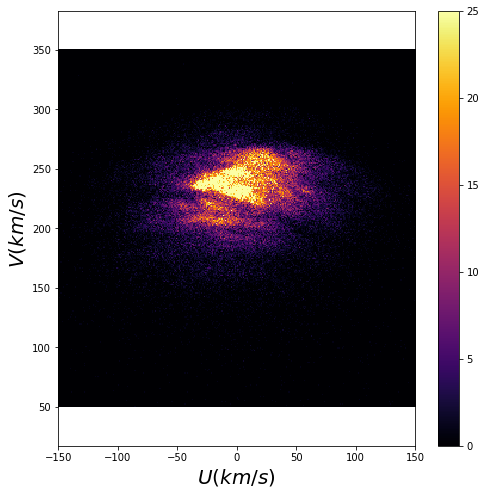

In [32]:
plt.figure(figsize=(8,8))
plt.xlabel("$U(km/s)$", fontsize=20)
plt.ylabel("$V(km/s)$", fontsize=20)
## Am again just labeling my axes.

plt.axis('equal')
## This is another way of making the spacing equal ##

plt.hist2d(Close_U, Close_V, (300, 300),range=[[-150,150],[50,350]], cmap='inferno',
           vmin=0,vmax=25)
# Creating the 2-d histogram using the plt function.
# Using 300 by 300 bins and my selected range.

plt.colorbar() 
#Plots the colorbar with my selected vmin and vmax#

# 2-D Log Histogram:  U x V

C:\Users\dougl\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


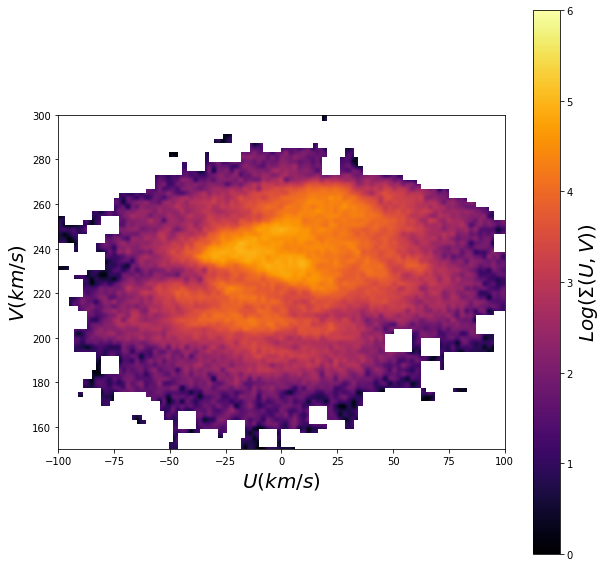

In [33]:
# For this the plt.hist2d will not be good for us. Better to use numpy version.
# A 2D-Hist in np saves its information in 2 matrices. The first one is the
# meshgrid of density values. This is the 2D Histogram. The second matrix are 
# the bins and how many values are in each bin.

# importing numpy
import numpy as np   

# Using the numpy 2d hist function. I am naming him H in order to
# take the log of it later.
H = np.histogram2d(Close_U,Close_V,bins=(np.arange(-100,100,step=2),np.arange(150,300,step=2)))

#Setting my figure size again #
plt.figure(figsize=(10,10))


#plotting the log of the hist
E = plt.imshow(np.log(H[0]).T,extent=[-100,100,150,300],origin='lower',cmap='inferno',interpolation='gaussian',
          vmin=0,vmax=6, aspect='equal')
# I asked it to take the log of H[0] because I am 
# selecting the first matrix I took the transpose of the whole thing because 
# for some reason the image came out flipped, and by taking the transpose and
# setting the origin as 'lower' I was able to orient it correctly. Finally
# the gaussian interpolation is there to make the histogram smoother. 
# I named the image of the Histogram to take its colorbar later


## Setting my labels again ## 
plt.xlabel("$U(km/s)$", fontsize=20)    
plt.ylabel("$V(km/s)$", fontsize=20)

C = plt.colorbar(E)
#Making the colorbar. I named it in order to label it.

C.set_label('$Log(\Sigma(U,V))$',size=20)
#Setting the label

# 'Spiral' Plot: Z x W colored by Vphi

C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


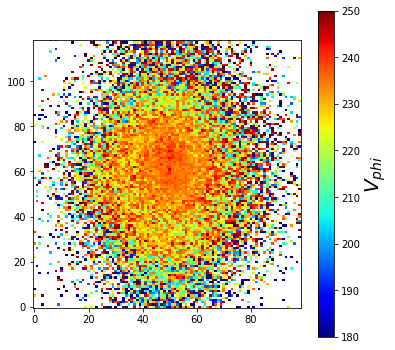

In [37]:
##############################################################################
# Calculating V_phi
Close_X = np.array(Close_X)
Close_V = np.array(Close_V)
Close_Y = np.array(Close_Y)
Close_U = np.array(Close_U)
Close_Vphi = (Close_X*Close_V - Close_Y*Close_U)/(Close_R)

##############################################################################
# Creating bins and 2d Hist for xed and yed.
bin_x = np.arange(-1,1, step=0.02)   ## 100
bin_y = np.arange(-60,60, step=1)    ## 120
H, xed, yed = np.histogram2d(Close_Z, Close_W, bins=(bin_x,bin_y))

##############################################################################
# Turning my variables into np arrays so np.where() works.
a = np.array(Close_Z)
b = np.array(Close_W)
c = np.array(Close_Vphi)

##############################################################################
# Creating my empty 2-D array that will be my color function
mean_Vphi = np.ndarray(shape=(len(yed)-1,len(xed)-1))

##############################################################################
# Loop to index each point; calculate its mean Vphi and set it to array
for i in range(0, len(bin_x)-1):
    for j in range(0, len(bin_y)-1):
        ichoose = np.where( (a>bin_x[i]) & (a<bin_x[i+1]) 
                           & (b>bin_y[j]) & (b < bin_y[j+1]))
        
        ####################################################
        # np matrices do rows first and columns second. Thats why its [j,i]
        mean_Vphi[j,i] = np.median(np.abs(c[ichoose]))

##############################################################################
# Setting figure size and plotting mean_Vphi with colorbar
plt.figure(figsize=(6,6))
T = plt.imshow(mean_Vphi, cmap = 'jet',origin='lower', vmin=180,vmax=250)
cbar = plt.colorbar(T)

##############################################################################
# Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
plt.gca().set_aspect(aspect='0.833333333333333',adjustable='box')
cbar.set_label('$V_{phi}$',size=20)